# Demonstration of Pulse and Signal Classes

In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import src.signal.signal as sgl
import src.signal.pulse as pls

## The Pulse Class

In [3]:
#default values for pulse parameters:
pls.Pulse()

pulse_period: 0.7, pulse_width: 0.05, pulse_phase: 3.141592653589793, pulse_peaks: True, pulse_height: 1.0, pulse_type: gaussian, pulse_sigma: 1

In [4]:
#optional name and description
pls.Pulse(name='Kevin', description='an interesting pulse')

name: Kevin, description: an interesting pulse, pulse_period: 0.7, pulse_width: 0.05, pulse_phase: 3.141592653589793, pulse_peaks: True, pulse_height: 1.0, pulse_type: gaussian, pulse_sigma: 1

## Pulse Types and their Profiles

In [7]:
#the pulse types
pls.Pulse._pulsetypes

['square', 'left triangle', 'right triangle', 'triangle', 'gaussian']

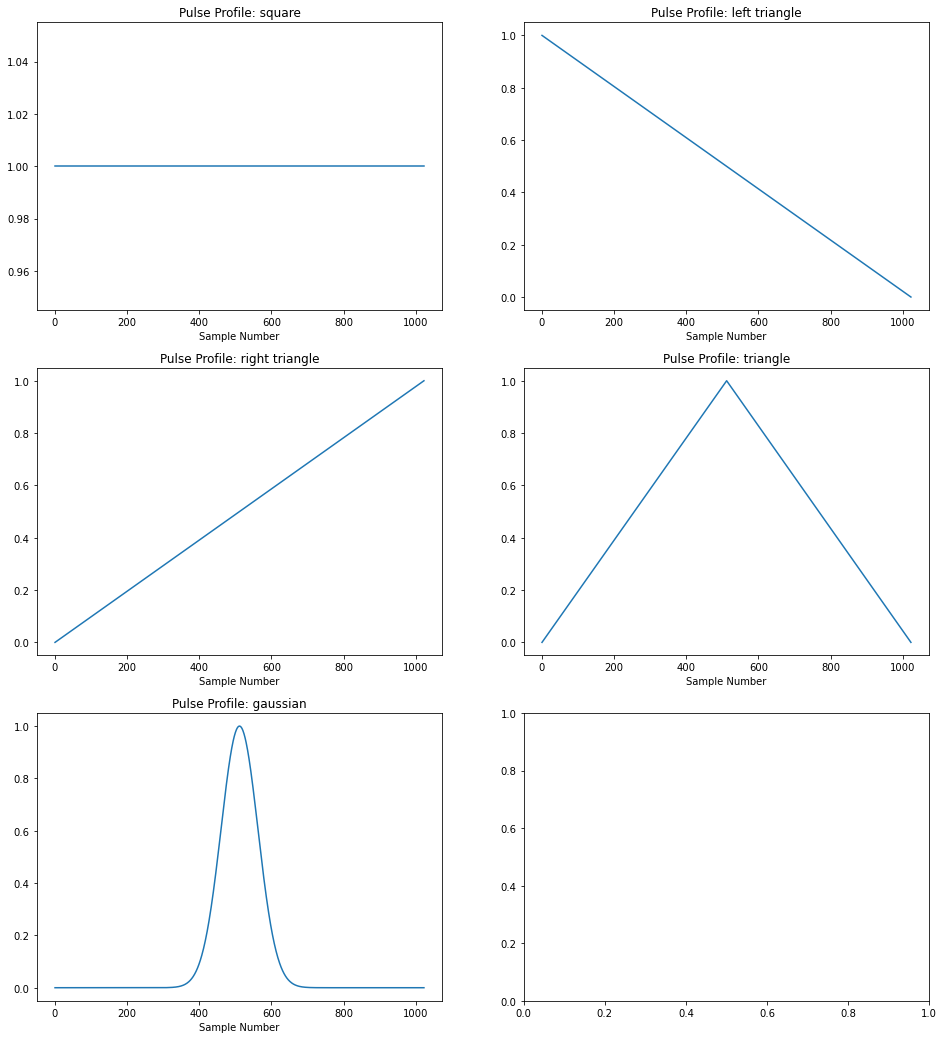

In [9]:
#what they look like
fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(16,18))
for pt, ax in zip(pls.Pulse._pulsetypes, axs.flatten()):
    ax.plot(pls.Pulse(pulse_type=pt)._pulse_profile(1024))
    ax.set_title(f'Pulse Profile: {pt}')
    ax.set_xlabel('Sample Number')

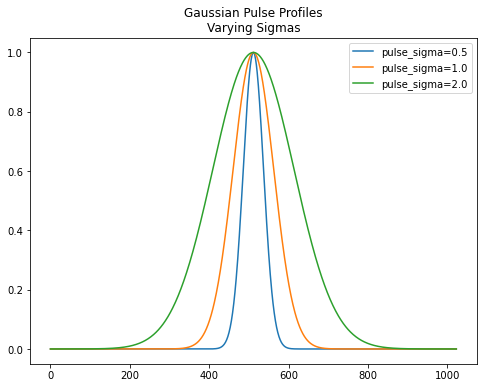

In [13]:
#gaussian profile has sigma parameter to control width:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(8,6))
for ps in [0.5,1.0, 2.0]:
    ax.plot(pls.Pulse(pulse_type='gaussian', pulse_sigma=ps)._pulse_profile(1024),
        label = f'pulse_sigma={ps}')
ax.set_title('Gaussian Pulse Profiles\nVarying Sigmas')
ax.legend()

ZeroDivisionError: float division by zero

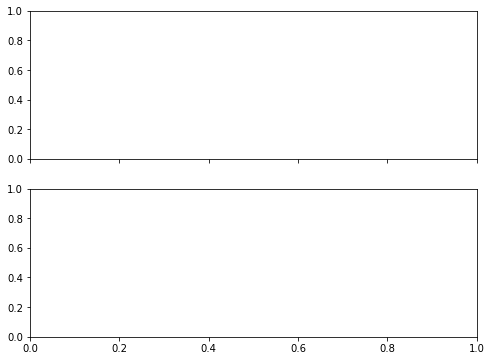

In [14]:
fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(8,6), sharex=True, sharey=True)
for pp, ax in zip([0.33, 0.7],axs.flatten()):
    ax.plot(pls.Pulse(pulse_type='gaussian', pulse_period=pp).pulse_signal(4096),
        label = f'pulse_period={pp}')
    ax.legend()

In [3]:
s = sgl.Signal()

In [4]:
noise_props = {'noise_mu':0, 'noise_sigma':1}
noise = s._gaussian_noise(10,noise_props)

<AxesSubplot:xlabel='Time (Seconds)'>

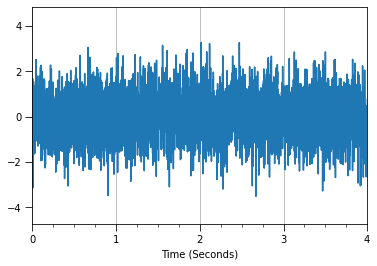

In [5]:
s.plot_signal(noise)

In [6]:
pulse = pls.Pulse( pulse_peaks=True,pulse_period=2, pulse_width=0.5, pulse_type='gaussian', pulse_height=6)
pulse

pulse_period: 2, pulse_width: 0.5, pulse_phase: 3.141592653589793, pulse_peaks: True, pulse_height: 6, pulse_type: gaussian, pulse_sigma: 1

<AxesSubplot:xlabel='Time (Seconds)'>

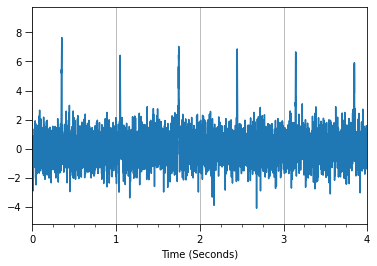

In [10]:
sig = s.sig_gen(300,
    pls.Pulse( pulse_peaks=True,pulse_period=0.7, pulse_phase=np.pi, pulse_width=0.1, pulse_type='gaussian', pulse_height=6),
    noise_props)
s.plot_signal(sig)

In [ ]:
s.plot_signal(sig)

In [ ]:
sig = s._sinusoid(10,3, 4,0)

In [ ]:
s.plot_signal(sig)

In [ ]:
s.plot_signal(sig)

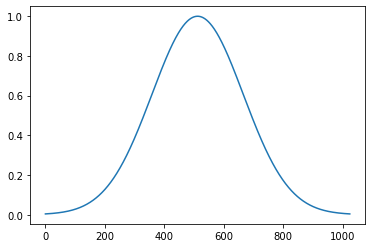

In [14]:
plt.plot(pls.Pulse(pulse_type='gaussian', pulse_phase = np.pi/4, pulse_sigma=3)._pulse_profile(1024))

In [18]:
plt.plot(pls.Pulse(pulse_type='gaussian', pulse_phase = np.pi, pulse_sigma=3).pulse_signal(12.0))

ZeroDivisionError: float division by zero

In [ ]:
pp = pls.Pulse( pulse_peaks=False, pulse_type='right triangle')

In [ ]:
zz=pp.pulse_signal()

In [ ]:
s.plot_signal(pls.Pulse( pulse_peaks=True, pulse_width=0.5, pulse_type='gaussian').pulse_signal())

In [ ]:
pp.pulse_period, pp.pulse_peaks

In [ ]:
pp.to_dict()

In [ ]:
[(p, getattr(pp,p)) for p in ['name','description'] if hasattr(pp,p)]

In [ ]:
zz = {'width':32, 'random_state':None}

In [ ]:
zz